# Abstract

We use the SUSY dataset and construct a neural network 
classifier, then apply dimensionality reduction via incrememntal PCA and retrain a network of similar architecture on this "reduced" dataset.
(Placeholder, we should probably rewrite this)

# Setup

Import the SUSY dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2021-04-09 02:53:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922377711 (880M) [application/x-httpd-php]
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz         100%[===================>] 879.65M  42.3MB/s    in 21s     

2021-04-09 02:53:25 (41.0 MB/s) - ‘SUSY.csv.gz’ saved [922377711/922377711]



In [ ]:
!gzip -d SUSY.csv.gz

gzip: SUSY.csv already exists; do you wish to overwrite (y or n)? y


In [ ]:
import pandas as pd
data = pd.read_csv('./SUSY.csv')

Define X and y as a subset of SUSY.csv (or the entire dataset, commented)

NOTE: Something we should discuss. Should we include only the low-level features, or only the high-level features, or just all of them? The high-level ones seem to be derived from the low-level ones, so if our purpose is to construct new dimensions from the data then we may want to leave them out.

In [ ]:
#All features: 8 low-level, 10 high-level
X=data.iloc[:50000,1:]
y=data.iloc[:50000,0]

#Full dataset
#X=data.iloc[:,1:]
#y=data.iloc[:,0]

Create the test, train, and validation sets from X and y

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

# Neural Network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
num_dims = (np.shape(X_train))[1]
print(num_dims)

18


Everytime we create a model, we will call this function, create_model(). This way, every model will have the same architecture after the input layer.

In [ ]:
def create_model():
  model = keras.models.Sequential()
  model.add(Dense(300, activation='relu'))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

Here we define the optimizer which we will use with all models.

In [ ]:
#exp_opt = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=0.05,
#    decay_steps=10000,
#    decay_rate=1e-5)

opt = keras.optimizers.Adam()


#model.compile(loss='categorical_crossentropy', optimizer=exp_opt)

In [ ]:
model_primary = create_model()
model_primary.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_primary.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=10)

Epoch 1/20
3200/3200 [==============================] - 8s 2ms/step - loss: 0.4829 - accuracy: 0.7691 - val_loss: 0.4550 - val_accuracy: 0.7926
Epoch 2/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4491 - accuracy: 0.7909 - val_loss: 0.4473 - val_accuracy: 0.7939
Epoch 3/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4441 - accuracy: 0.7927 - val_loss: 0.4400 - val_accuracy: 0.7967
Epoch 4/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4394 - accuracy: 0.7963 - val_loss: 0.4372 - val_accuracy: 0.7996
Epoch 5/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4457 - accuracy: 0.7931 - val_loss: 0.4408 - val_accuracy: 0.7988
Epoch 6/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4380 - accuracy: 0.7977 - val_loss: 0.4515 - val_accuracy: 0.7946
Epoch 7/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4335 - accuracy: 0.8000 - val_loss: 0.4420 - val_accuracy:

Evaluate the performance of the model.

In [ ]:
_, accuracy = model_primary.evaluate(X_test, y_test)

250/250 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.7869


In [ ]:
from sklearn.metrics import roc_curve, auc

# Evaluate on validation set
score = model_primary.evaluate(X_val, y_val, verbose=1)
print('\nValidation loss / accuracy: %0.4f / %0.4f'%(score[0], score[1]))
y_pred = model_primary.predict(X_val)
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
print('Validation ROC AUC:', roc_auc)

# Evaluate on test set
score = model_primary.evaluate(X_test, y_test, verbose=1)
print('\nTest loss / accuracy: %0.4f / %0.4f'%(score[0], score[1]))
y_pred = model_primary.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('Test ROC AUC:', roc_auc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7952

Validation loss / accuracy: 0.4575 / 0.7952
Validation ROC AUC: 0.8677326444467652
250/250 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.7869

Test loss / accuracy: 0.4725 / 0.7869
Test ROC AUC: 0.8588326274509803


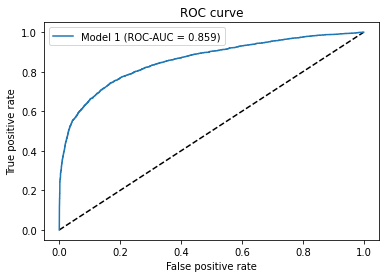

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], 'k--')
#plt.legend(loc=2, prop={'size': 15})
plt.plot(fpr, tpr, label='Model 1 (ROC-AUC = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Principal Component Analysis

We perform PCA to reduce our data set's dimensionality.

In [ ]:
#This is the number of dimensions that we want to reduce our dataset to using dimensionality reduction.
reduced_dims = 15

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches=100
inc_pca = IncrementalPCA(n_components=reduced_dims)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_train_reduced = inc_pca.transform(X_train)
X_val_reduced = inc_pca.transform(X_val)
X_test_reduced = inc_pca.transform(X_test)

In [ ]:
np.shape(X_train_reduced[1])

(15,)

# Retraining the Neural Network


In [ ]:
model_reduced = create_model()
model_reduced.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_reduced.fit(X_train_reduced, y_train, validation_data=(X_val_reduced, y_val), epochs=20, batch_size=10)

Epoch 1/20
3200/3200 [==============================] - 8s 2ms/step - loss: 0.4758 - accuracy: 0.7753 - val_loss: 0.4432 - val_accuracy: 0.7989
Epoch 2/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4355 - accuracy: 0.7982 - val_loss: 0.4388 - val_accuracy: 0.7971
Epoch 3/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4353 - accuracy: 0.8016 - val_loss: 0.4376 - val_accuracy: 0.7991
Epoch 4/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4326 - accuracy: 0.7993 - val_loss: 0.4424 - val_accuracy: 0.7955
Epoch 5/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4297 - accuracy: 0.8033 - val_loss: 0.4421 - val_accuracy: 0.7975
Epoch 6/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4301 - accuracy: 0.8020 - val_loss: 0.4363 - val_accuracy: 0.8012
Epoch 7/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4272 - accuracy: 0.8019 - val_loss: 0.4402 - val_accuracy:

# Evaluation of the Reduced Dimensions

In [ ]:
# Evaluate on validation set
score = model_reduced.evaluate(X_val_reduced, y_val, verbose=1)
print('\nValidation loss / accuracy: %0.4f / %0.4f'%(score[0], score[1]))
y_pred_reduced = model_reduced.predict(X_val_reduced)
fpr, tpr, _ = roc_curve(y_val, y_pred_reduced)
roc_auc = auc(fpr, tpr)
print('Validation ROC AUC:', roc_auc)

# Evaluate on test set
score = model_reduced.evaluate(X_test_reduced, y_test, verbose=1)
print('\nTest loss / accuracy: %0.4f / %0.4f'%(score[0], score[1]))
y_pred_reduced = model_reduced.predict(X_test_reduced)
fpr, tpr, _ = roc_curve(y_test, y_pred_reduced)
roc_auc = auc(fpr, tpr)
print('Test ROC AUC:', roc_auc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.7902

Validation loss / accuracy: 0.4721 / 0.7902
Validation ROC AUC: 0.8606517948421692
250/250 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.7856

Test loss / accuracy: 0.4823 / 0.7856
Test ROC AUC: 0.8545256470588236


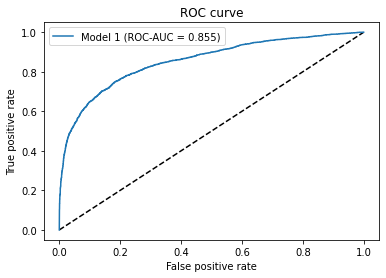

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], 'k--')
#plt.legend(loc=2, prop={'size': 15})
plt.plot(fpr, tpr, label='Model 1 (ROC-AUC = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Testing various numbers of reduced dimensions

Here we test across a range of numbers of reduced dimensions.
(work in progress)